In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


In [66]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
validation = pd.read_csv("validation.csv")

In [67]:
#X = test.drop(columns=['profit_margin']) this is every feature except profit_margin
#X_Train = train[['popularity','budget','revenue','runtime','vote_average','vote_count']] This is every numerical feature

X_Train = train.drop(columns=['profit_margin'])
Y_Train = train['profit_margin']

X_Test = test.drop(columns=['profit_margin'])
Y_Test = test['profit_margin']

X_Validation = validation.drop(columns=['profit_margin'])
Y_Validation = validation['profit_margin']


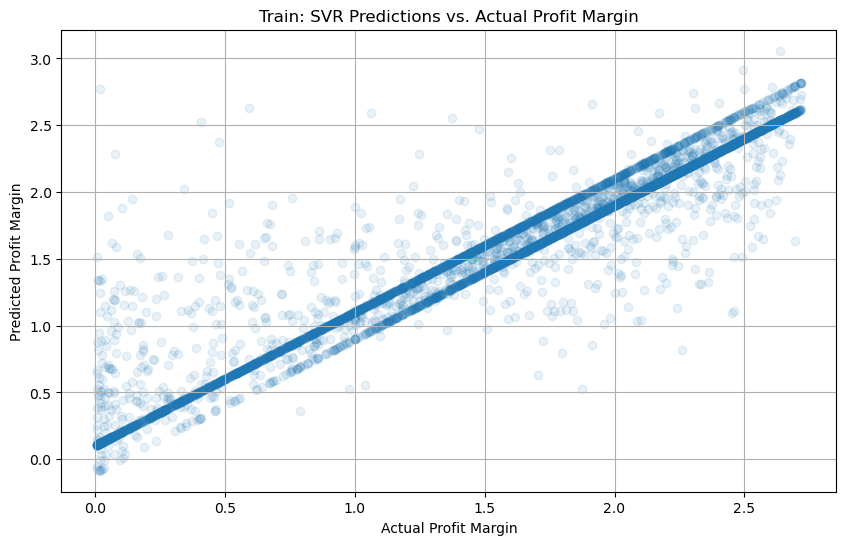

MSE: 0.04994387061660937
RMSE: 0.22348125338965094
MAE: 0.13822445462363872


In [72]:
#Train
svr = SVR(kernel='rbf', C= 10.0, gamma = 0.2) #high C value reduce margin but may lead to overfitting. Small value is opposite, gamma is default

svr.fit(X_Train, Y_Train)

y_pred_train = svr.predict(X_Train)

rmse = np.sqrt(mean_squared_error(Y_Train, y_pred_train))
mae = mean_absolute_error(Y_Train, y_pred_train)
mse = mean_squared_error(Y_Train, y_pred_train)

plt.figure(figsize=(10, 6))
plt.scatter(Y_Train, y_pred_train, alpha=0.1)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("Train: SVR Predictions vs. Actual Profit Margin")
plt.grid(True)
plt.show()  

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


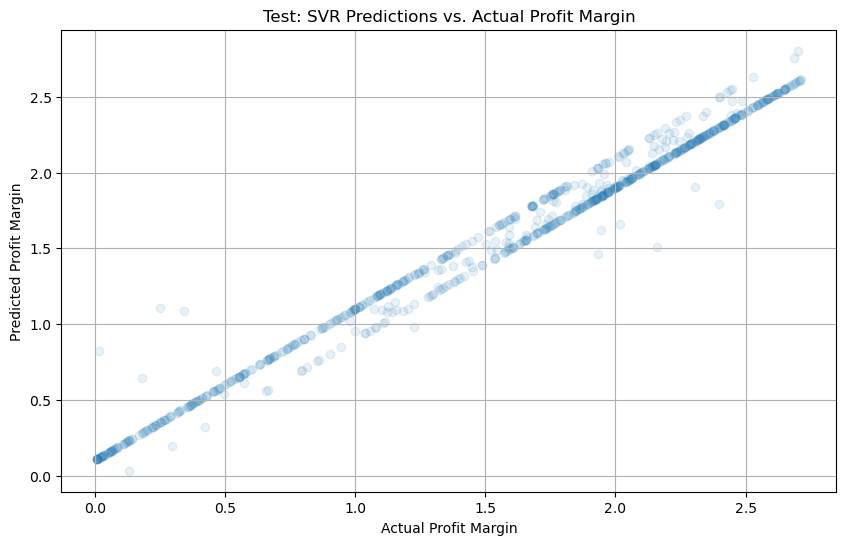

MSE: 0.013905332763977386
RMSE: 0.11792087501361828
MAE: 0.10074765373234551


In [63]:
#Test
svr = SVR(kernel='rbf', C=10, gamma=0.2) #high C value reduce margin but may lead to overfitting. Small value is opposite, gamma is default

svr.fit(X_Test, Y_Test)

y_pred_test = svr.predict(X_Test)

rmse = np.sqrt(mean_squared_error(Y_Test, y_pred_test))
mae = mean_absolute_error(Y_Test, y_pred_test)
mse = mean_squared_error(Y_Test, y_pred_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, y_pred_test, alpha=0.1)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("Test: SVR Predictions vs. Actual Profit Margin")
plt.grid(True)
plt.show() 

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


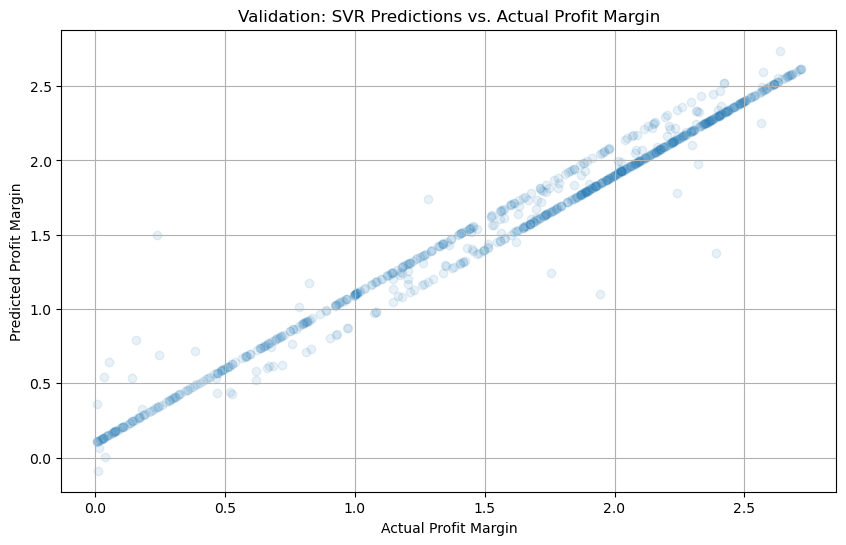

MSE: 0.017030250423651614
RMSE: 0.13050000162318626
MAE: 0.10454503873961776


In [64]:
#Validation
svr = SVR(kernel='rbf', C=10, gamma=0.2) #high C value reduce margin but may lead to overfitting. Small value is opposite, gamma is default

svr.fit(X_Validation, Y_Validation)

y_pred_validation = svr.predict(X_Validation)

rmse = np.sqrt(mean_squared_error(Y_Validation, y_pred_validation))
mae = mean_absolute_error(Y_Validation, y_pred_validation)
mse = mean_squared_error(Y_Validation, y_pred_validation)

plt.figure(figsize=(10, 6))
plt.scatter(Y_Validation, y_pred_validation, alpha=0.1)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("Validation: SVR Predictions vs. Actual Profit Margin")
plt.grid(True)
plt.show()  

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


In [69]:
model = SVR(kernel='rbf')
cv_results = cross_validate(model, X_Train, Y_Train, cv=5)
print(f'Cross Validate: {cv_results}')

Cross Validate: {'fit_time': array([1.18583035, 1.20876908, 1.20680022, 1.22669435, 1.18483233]), 'score_time': array([0.4438138 , 0.45278978, 0.44880223, 0.44979787, 0.44880152]), 'test_score': array([0.27963011, 0.26733585, 0.24373013, 0.24148588, 0.24352714])}


In [70]:
model = SVR(kernel='rbf', C = 10, gamma = 0.2)
cv_results = cross_validate(model, X_Train, Y_Train, cv=5)
print(f'Cross Validate: {cv_results}')

Cross Validate: {'fit_time': array([2.64595389, 2.62498188, 2.59606194, 2.60703278, 2.61700726]), 'score_time': array([0.44880319, 0.44680595, 0.45079684, 0.44979644, 0.44979787]), 'test_score': array([0.11235013, 0.13072462, 0.08891095, 0.07302102, 0.12957598])}
